### KMeans Implementation
The task is to implement K-Means algorithm to cluster the dataset consisting of socio-economic and health factors of countries to determine the overall development of the country.

In [1]:
# Importing the necessary dependencies
import numpy as np
import pandas as pd
import random
import math
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [2]:
# Data Cleaning (checking missing values and assigning them as NaN)

def data_cleaning():
    invalid_cells=['na','N/a',np.nan]
    df=pd.read_csv('Country_data.csv', na_values=invalid_cells)
    df.set_index("country", inplace=True)
    return df

df=data_cleaning()
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [3]:
# creating the cluster labels and list of colors of respective labels
colors=['fuchsia','aqua','gold','brown','g','black','r','b','orange','pink']
cluster=list('abcdefghijklmnop')
number_of_clusters=3

In [4]:
# Scaling columns in [-1,1] range

def scale_data():
    scaler=MinMaxScaler()
    for x in df.columns[0:9]:
        scaler.fit(np.array(df[x]).reshape(-1,1))
        df[x]=scaler.transform(np.array(df[x]).reshape(-1,1))
        # df[x].round(2)
        df[x] = df[x].round(2)
scale_data()

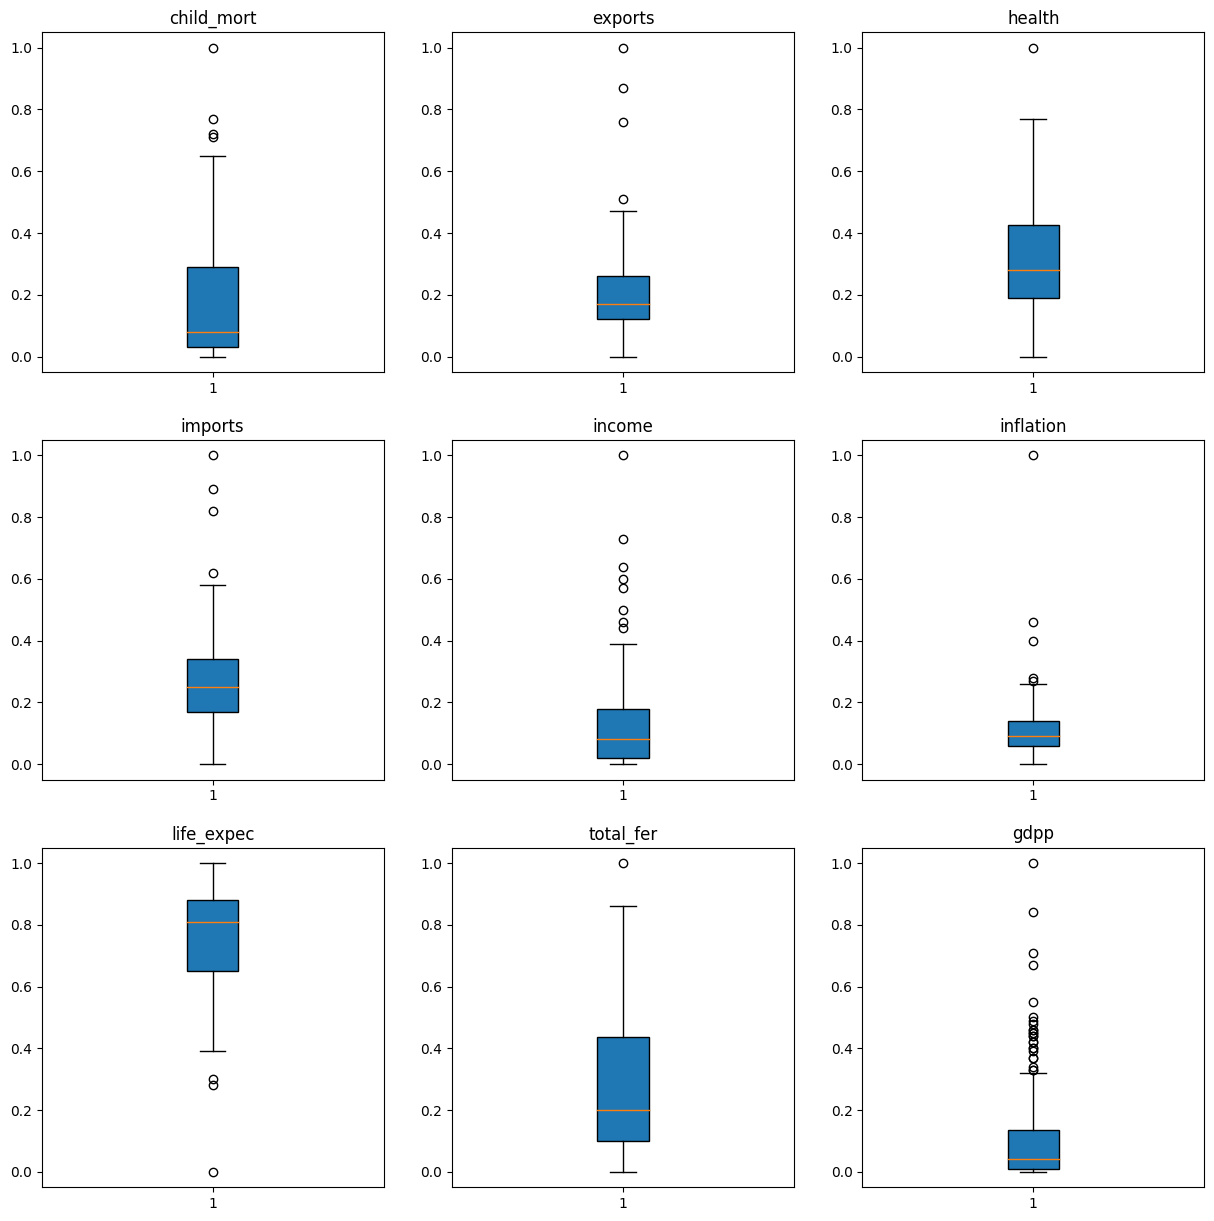

<Figure size 640x480 with 0 Axes>

In [5]:
# Lets visualize the data, understand the distribution and outliers if any using box and whisker plots (9 subplots for 9 features)

def boxPlot():
    # ax=np.array([])
    fig, ax=plt.subplots(3,3,figsize=(15,15))
    ax=ax.reshape(1,9)
    
    for i in range(9):
        ax[0][i].boxplot(df[df.columns[i]],patch_artist=True)
        ax[0][i].set_title(df.columns[i])
    ax=ax.reshape(3,3)
    plt.show()
    plt.clf()
boxPlot()

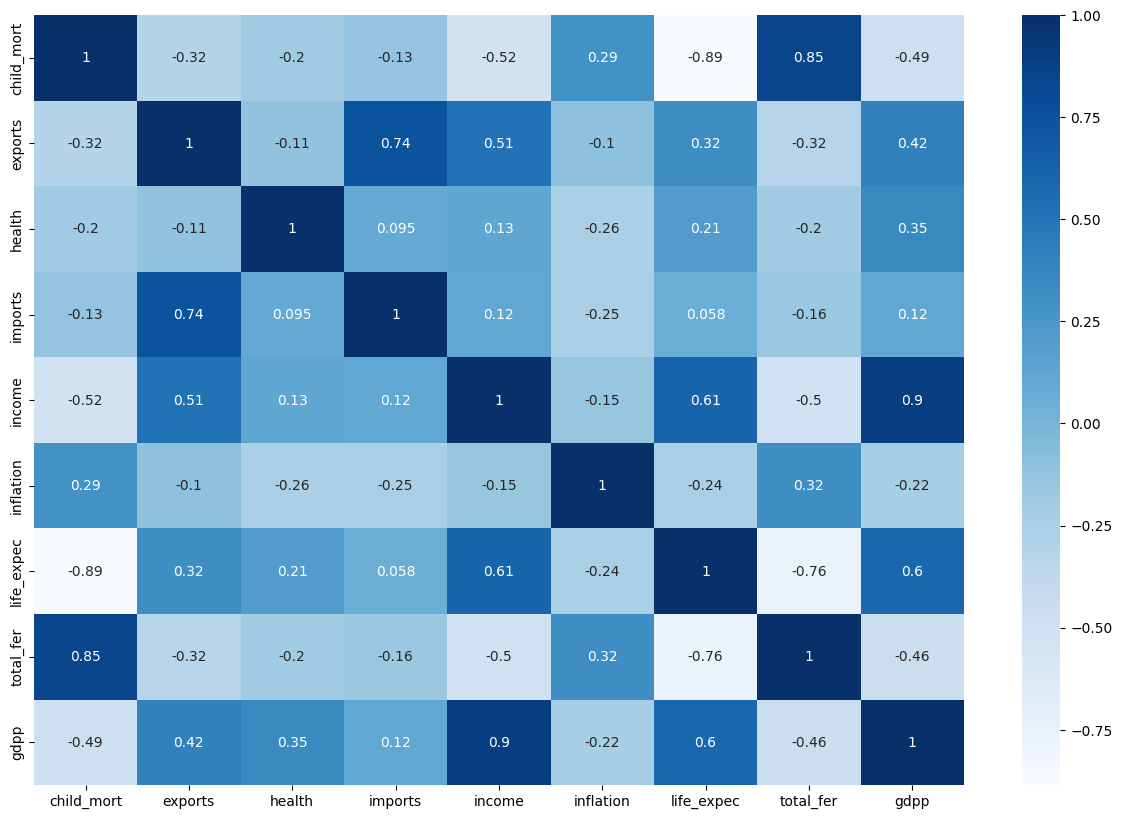

<Figure size 640x480 with 0 Axes>

In [6]:
# Creating correlation matrix

def correlation_of_data():
    a=df[df.columns[0:9]].corr()
    plt.figure(figsize=(15,10))
    sns.heatmap(a,annot=True,cmap="Blues")
    plt.show()
    plt.clf()
correlation_of_data()

### Silhouette Score and Elbow Method
both silhouette score and elbow drawings are plotted for different k values ranging from 2 to 15

c:\Users\Lalit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lalit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lalit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lalit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\

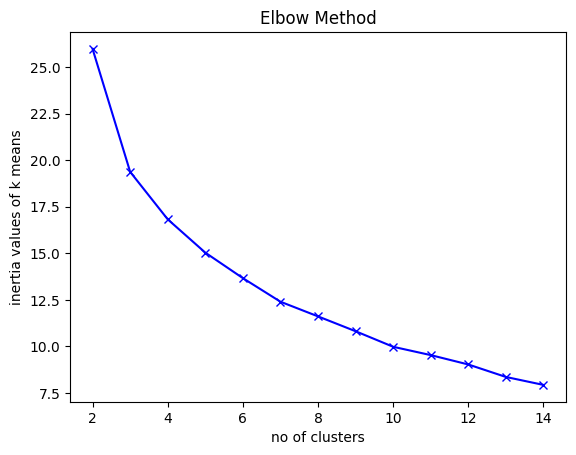

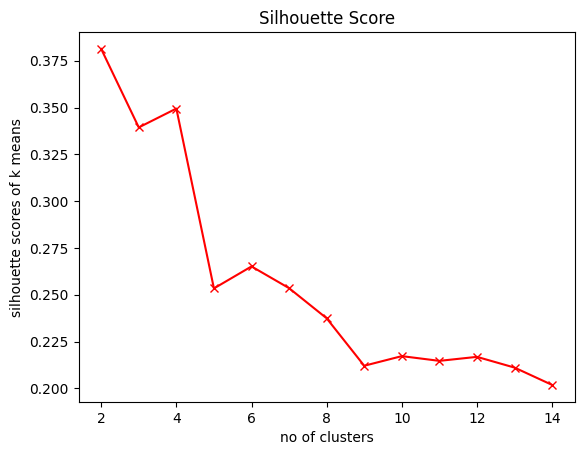

<Figure size 640x480 with 0 Axes>

In [7]:
def plot_scores():
    SSO={'silhouette_score':[],'elbow':[]}
    for i in range(2,15):
        kmeans=KMeans(n_clusters=i)
        a=kmeans.fit_predict(df[df.columns[0:9]])
        SSO['elbow'].append(kmeans.inertia_)
        SSO['silhouette_score'].append(silhouette_score(df[df.columns[0:9]],a))
    
    # plotting Elbow method plot
    plt.title("Elbow Method")
    plt.plot(list(range(2,15)),SSO['elbow'],marker='x',color='b',label='elbow')
    plt.xlabel('no of clusters')
    plt.ylabel('inertia values of k means')
    plt.show()
    plt.clf()

    # plotting Silhouette Score plot
    plt.title("Silhouette Score")
    plt.plot(list(range(2,15)),SSO['silhouette_score'],marker='x',color='r',label='silhouette_score')
    plt.xlabel('no of clusters')
    plt.ylabel('silhouette scores of k means')
    plt.show()
    plt.clf()
plot_scores()

In [8]:
# Considering both the Elbow Method and the Silhouette Score, 3 clusters seem a good choice. The elbow method shows a noticeable bend around 3 clusters, and the silhouette score for 3 clusters is relatively high at 0.335.

c:\Users\Lalit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


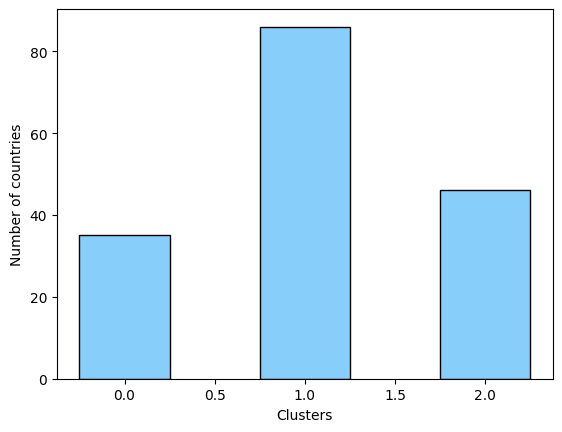

In [9]:
# Checking same using KMeans library
def kmeans_library():
    kmeans=KMeans(n_clusters=3)
    kmeans.fit(df[df.columns[0:9]])
    temp=kmeans.predict(df[df.columns[0:9]])
    centroid=kmeans.cluster_centers_.round(2)
    df['clusters']=temp
    colors = ['LightSkyBlue']
    plt.hist(df['clusters'], bins=range(4), color=colors, edgecolor='black', align='left', rwidth=0.5)
    # plt.hist(df['clusters'],color=colors)
    plt.xlabel('Clusters')
    plt.ylabel('Number of countries')
    plt.show()
    del(df['clusters'])
    
kmeans_library()

In [10]:
# Lets start the clustering process (creating random centroids)

centroid_created =np.zeros((3,9))
def create_random_centroid():
    centroid=[]
    for i in range(number_of_clusters):
        centroid.append(random.sample(list(np.linspace(0,1,167).round(2)),9))
    global centroid_created  
    centroid_created=np.array(centroid)
    print('creating new centroid \n')

create_random_centroid()
print(centroid_created)

creating new centroid 

[[0.39 0.54 0.85 0.92 0.81 0.86 0.57 0.22 0.02]
 [0.4  0.   0.25 0.77 0.89 0.54 0.73 0.08 0.69]
 [0.45 0.96 0.44 0.17 0.57 0.67 0.78 0.37 0.52]]


In [11]:
# adding new columns to data frame containing euclidean distance calculated from each centre point to each country

def add_new_columns():
    for i in range(number_of_clusters):
        df[cluster[i]]=np.sqrt(sum((df[x]-centroid_created[i][ind])**2 for ind,x in enumerate(df.columns[0:9]))).round(2)
    df['min values']=df.iloc[:,9:(9+number_of_clusters)].idxmin(axis=1)
add_new_columns()
df[df.columns[9:]]

,a,b,c,min values
country,,,,
Afghanistan,1.54,1.48,1.39,c
Albania,1.50,1.30,1.33,b
Algeria,1.51,1.30,1.22,c
Angola,1.56,1.49,1.23,c
Antigua and Barbuda,1.45,1.23,1.24,b
...,...,...,...,...
Vanuatu,1.50,1.37,1.28,c
Venezuela,1.44,1.23,1.14,c
Vietnam,1.34,1.30,1.21,c


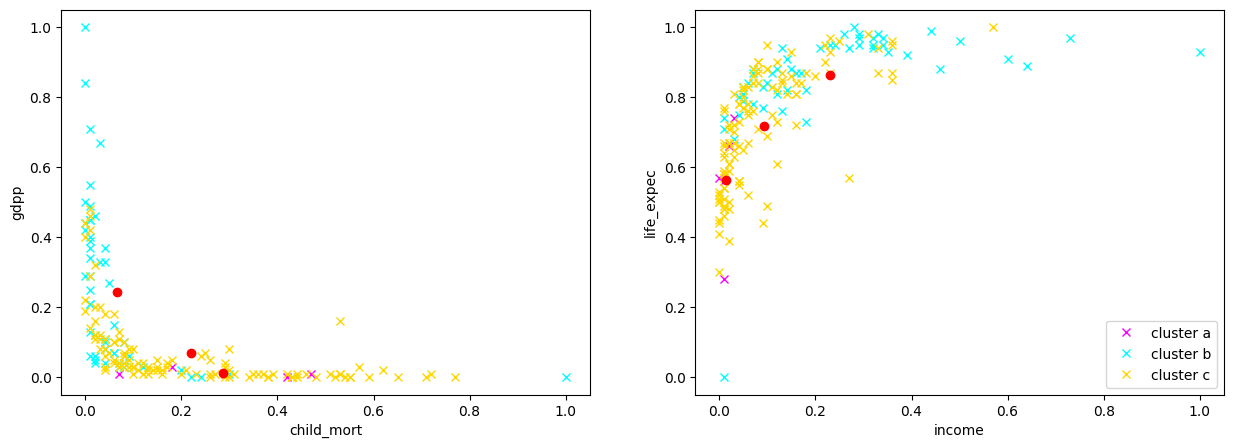

<Figure size 640x480 with 0 Axes>

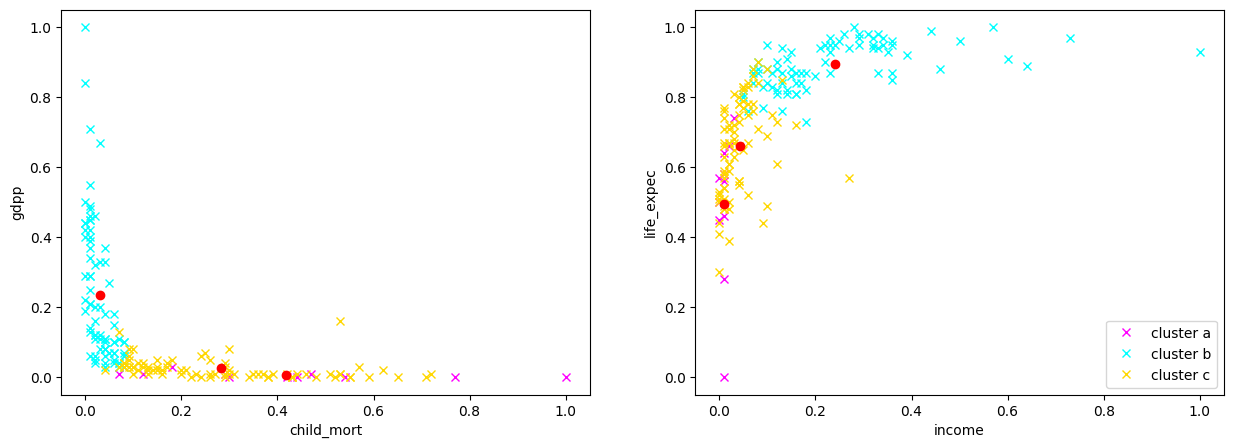

<Figure size 640x480 with 0 Axes>

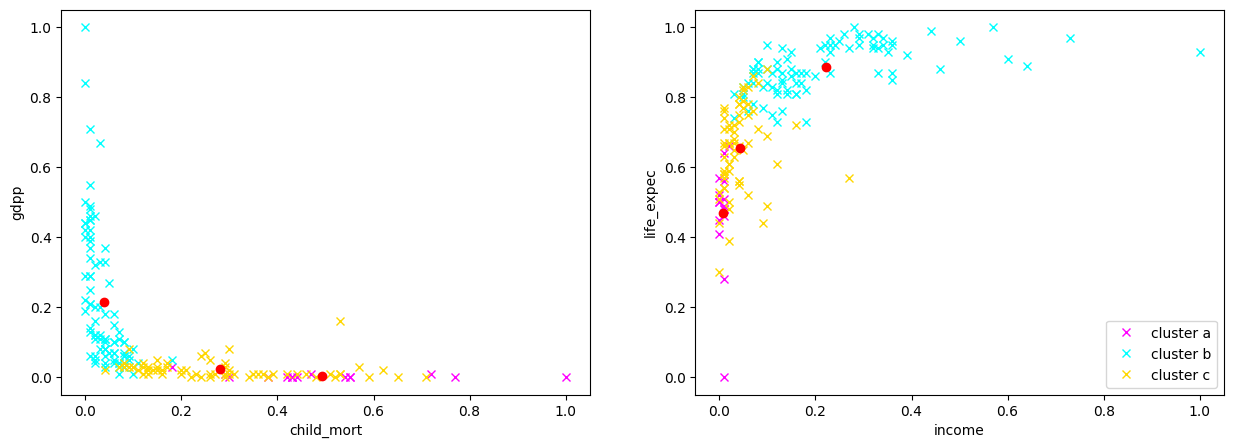

<Figure size 640x480 with 0 Axes>

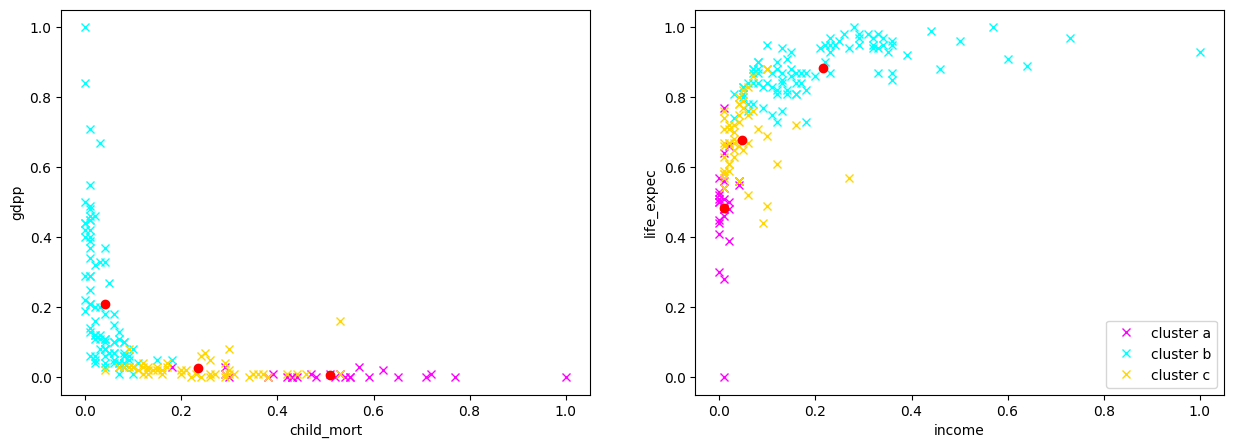

<Figure size 640x480 with 0 Axes>

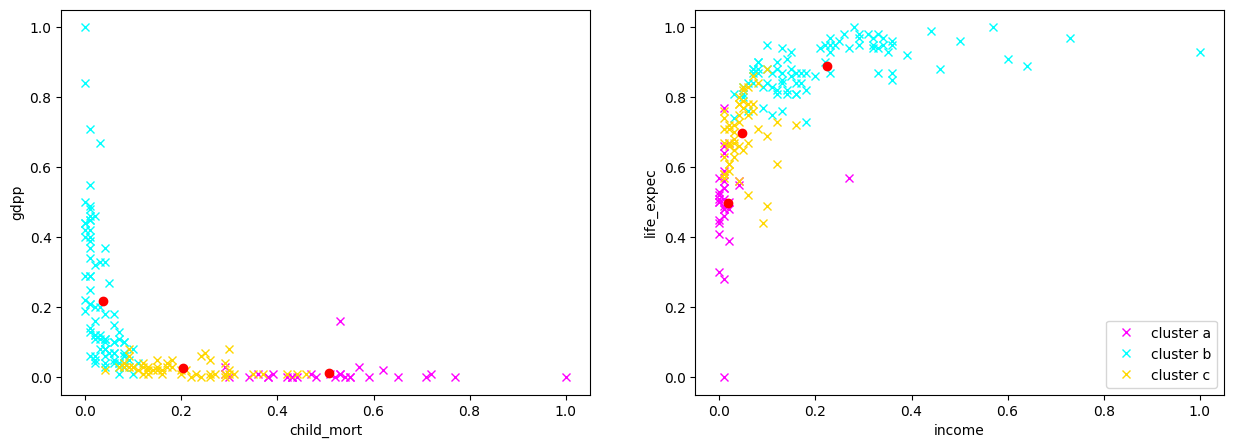

<Figure size 640x480 with 0 Axes>

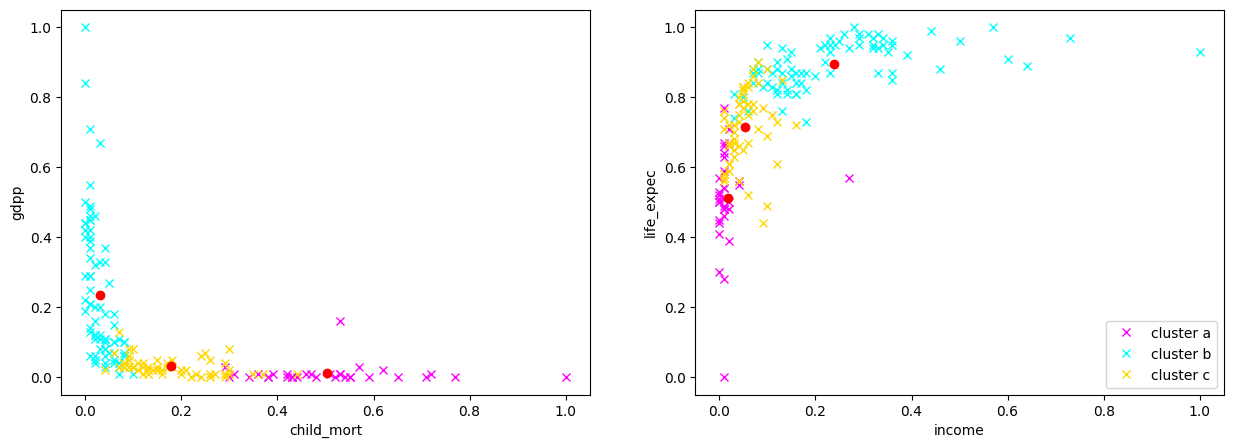

<Figure size 640x480 with 0 Axes>

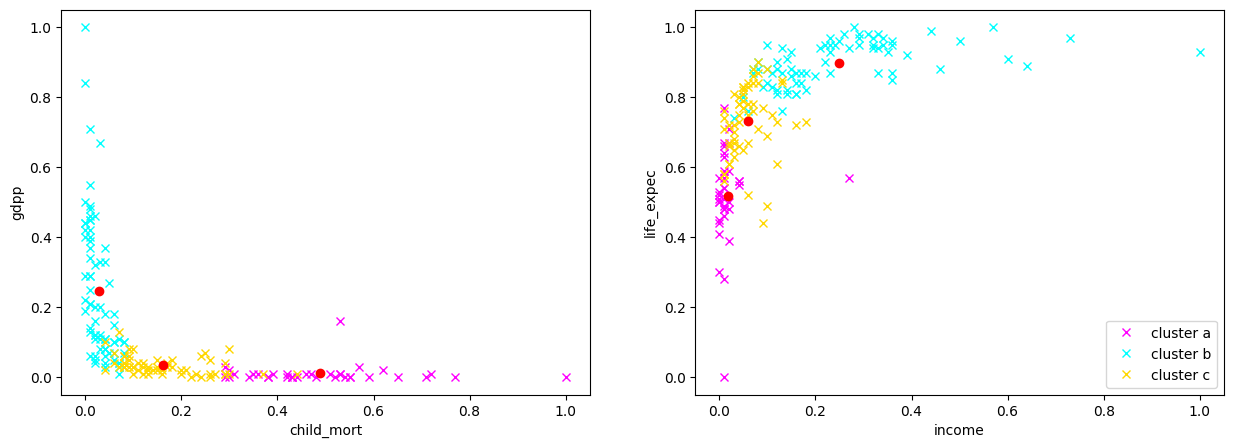

<Figure size 640x480 with 0 Axes>

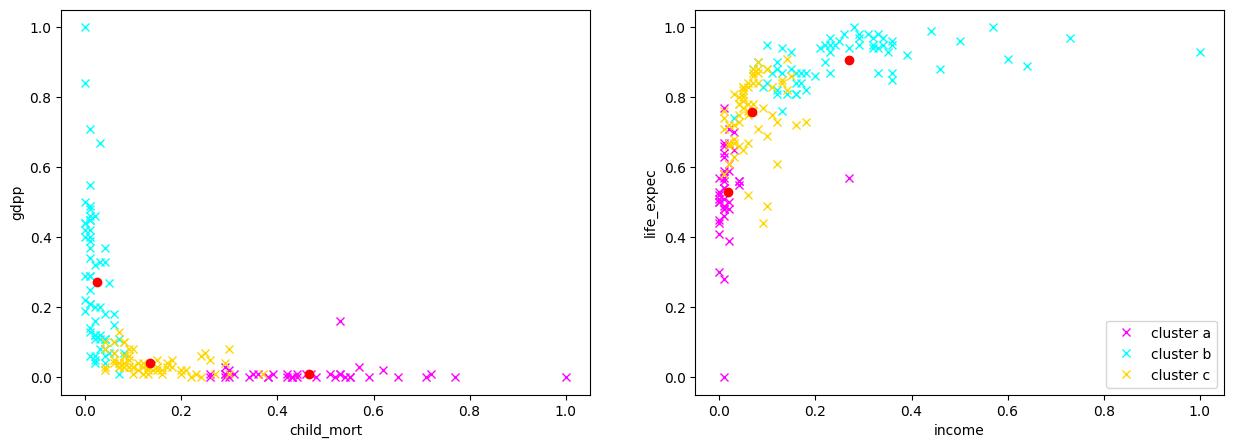

<Figure size 640x480 with 0 Axes>

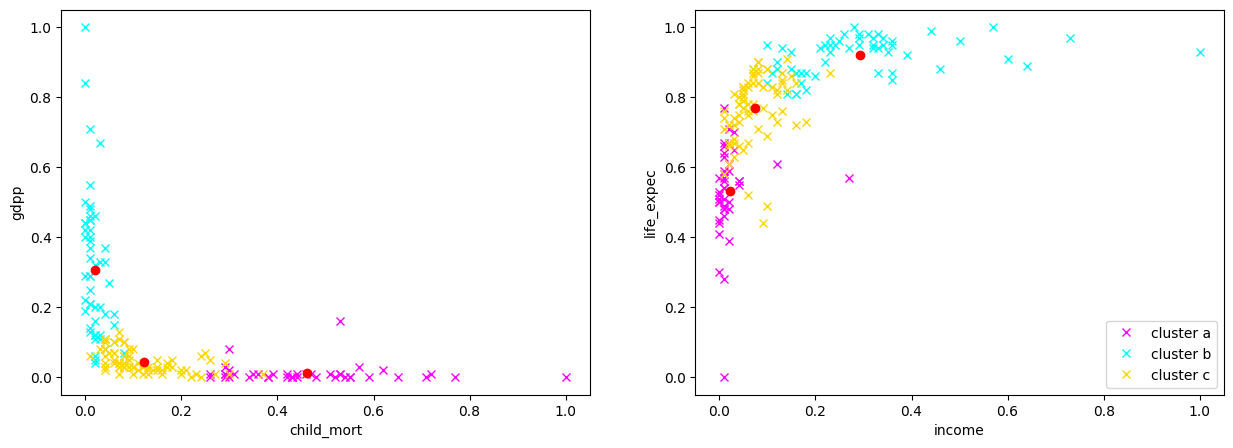

<Figure size 640x480 with 0 Axes>

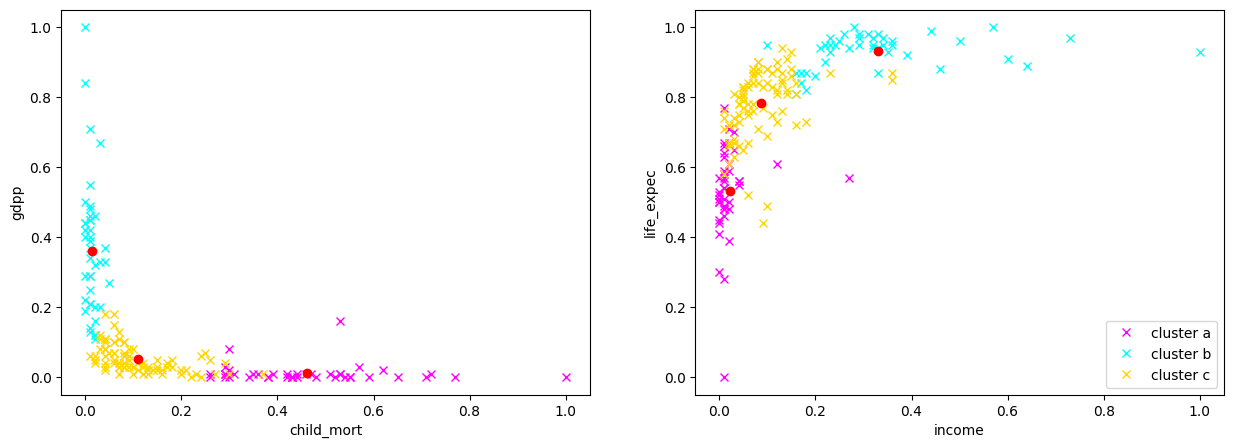

<Figure size 640x480 with 0 Axes>

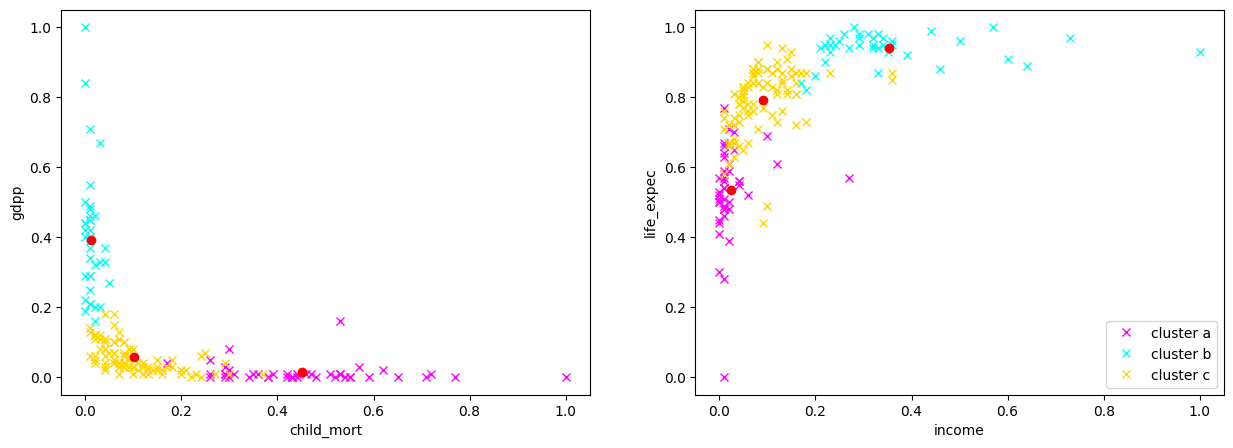

<Figure size 640x480 with 0 Axes>

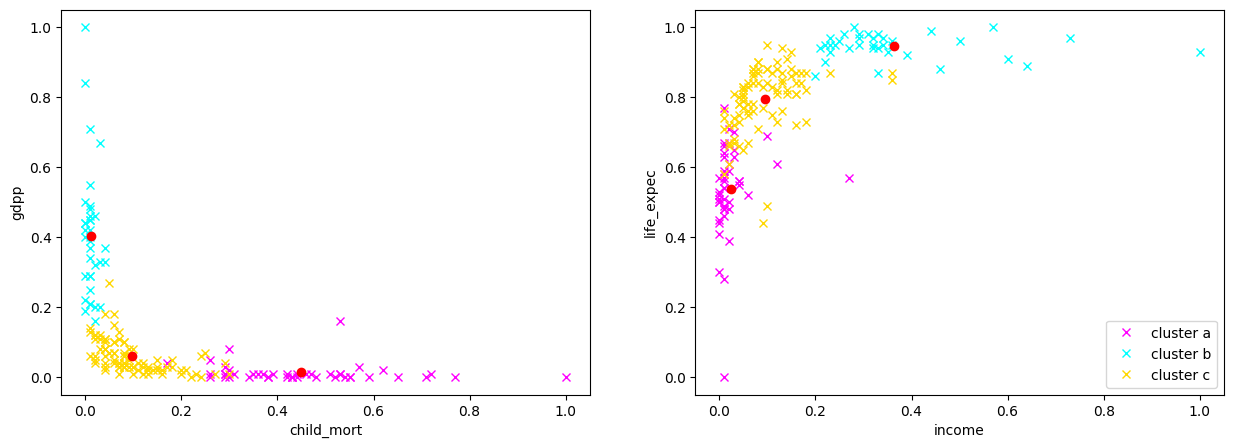

<Figure size 640x480 with 0 Axes>

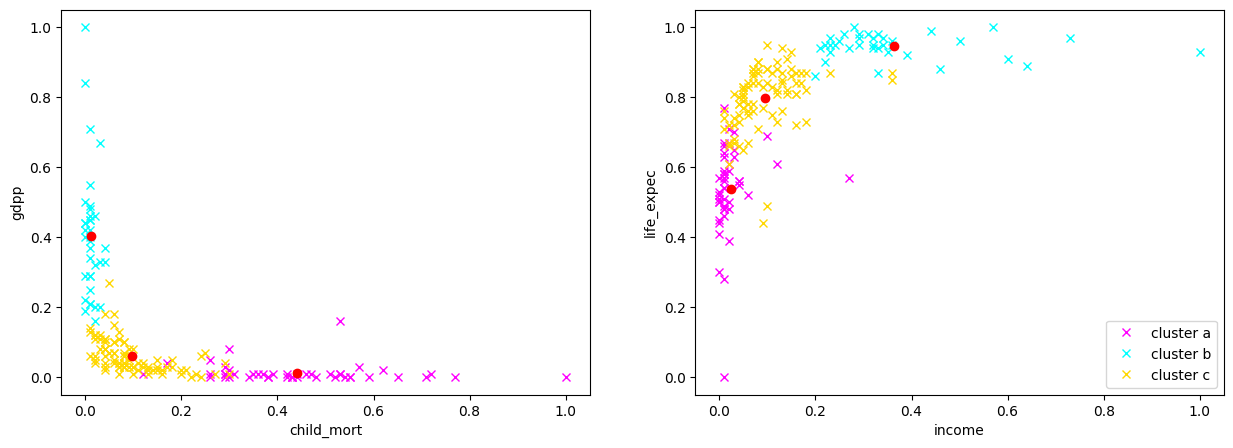

<Figure size 640x480 with 0 Axes>

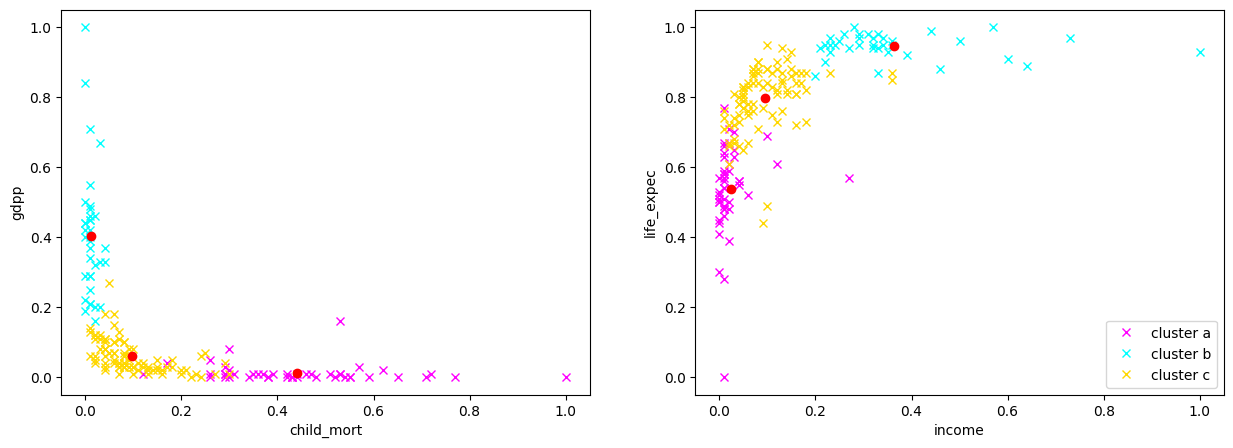

<Figure size 640x480 with 0 Axes>

In [12]:
# Clustering the data points
old_centroid = None

def move_centroids():
    global centroid_created, old_centroid
    
    # Recalculate centroids based on the mean of the clusters
    for i in range(number_of_clusters):
        centroid_created[i] = df[df['min values'] == cluster[i]][df.columns[0:9]].mean(axis=0)
        
        # Check for NaN values in the centroids
        if math.isnan(list(centroid_created[i])[0]):
            print("Initial centroid guessed is too far away, creating new random centroid")
            create_random_centroid()
            add_new_columns()
    
    # Plot the clusters and centroids
    axs = []
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    
    for k in range(number_of_clusters):
        # Plot child_mort vs gdpp
        axs[0].plot(df[df['min values'] == cluster[k]]['child_mort'],
                    df[df['min values'] == cluster[k]]['gdpp'], 'x', color=colors[k],
                    label=f'cluster {cluster[k]}')
        
        # Plot income vs life_expec
        axs[1].plot(df[df['min values'] == cluster[k]]['income'],
                    df[df['min values'] == cluster[k]]['life_expec'], 'x', color=colors[k],
                    label=f'cluster {cluster[k]}')
    
    # Plot centroids
    axs[0].plot(centroid_created[:, 0], centroid_created[:, 8], 'o', color='r')
    axs[1].plot(centroid_created[:, 4], centroid_created[:, 6], 'o', color='r')
    
    # Set labels
    axs[0].set_xlabel('child_mort')
    axs[0].set_ylabel('gdpp')
    axs[1].set_xlabel('income')
    axs[1].set_ylabel('life_expec')
    
    plt.legend()
    plt.show()
    plt.clf()
    
    # Update clusters and check for convergence
    add_new_columns()
    if str(centroid_created) != old_centroid:
        old_centroid = str(centroid_created)
        move_centroids()
    else:
        return

# Call the function to move centroids
move_centroids()

In [33]:
# Observations:
# 1. cluster 'b' has Low child_mort, High life_expec, income and gdpp along with all other coinciding featuers which shows that cluster a is of develped countries.

# 2. Similarly, cluster 'a' has high child_mort and, very low life_expec, income and gdpp with all other coinciding features which categorises under under-developed countries.

# 3. and finally cluster 'c' has Normal child_mort, Normal Low life_expec, income and gdpp along with all other coinciding featuers which categorises under developing countries.

In [34]:
# Adding label to each country

df['Nation status']=' '
df.loc[df['min values']=='a','Nation status']='under-developed'
df.loc[df['min values']=='b','Nation status']='developed'
df.loc[df['min values']=='c','Nation status'] ='developing'
display(df['Nation status'])

0      under-developed
1           developing
2           developing
3      under-developed
4           developing
            ...       
162         developing
163         developing
164         developing
165    under-developed
166    under-developed
Name: Nation status, Length: 167, dtype: object

In [35]:
# Printing individual countries as per their clusters
# df.reset_index(inplace=True)
developed_countries = np.array(df[df['Nation status']=='developed']['country'])
print('Developed Countries: \n', developed_countries)

Developed Countries: 
 ['Australia' 'Austria' 'Bahrain' 'Belgium' 'Brunei' 'Canada' 'Cyprus'
 'Czech Republic' 'Denmark' 'Finland' 'France' 'Germany' 'Greece'
 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan' 'Kuwait' 'Luxembourg'
 'Malta' 'Netherlands' 'New Zealand' 'Norway' 'Portugal' 'Qatar'
 'Singapore' 'Slovak Republic' 'Slovenia' 'South Korea' 'Spain' 'Sweden'
 'Switzerland' 'United Arab Emirates' 'United Kingdom' 'United States']


In [36]:
# df.reset_index(inplace=True)
underdeveloped_countries = np.array(df[df['Nation status'] == 'under-developed']['country'])
print("Underdeveloped countries: \n", underdeveloped_countries)

Underdeveloped countries: 
 ['Afghanistan' 'Angola' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda'
 'Senegal' 'Sierra Leone' 'Solomon Islands' 'Sudan' 'Tanzania'
 'Timor-Leste' 'Togo' 'Uganda' 'Yemen' 'Zambia']


In [37]:
# df.reset_index(inplace=True)
developing_countries = np.array(df[df['Nation status']=='developing']['country'])
print('Developing Countries: \n', developing_countries)

Developing Countries: 
 ['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Barbados' 'Belarus' 'Belize'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Cambodia' 'Cape Verde' 'Chile' 'China' 'Colombia'
 'Costa Rica' 'Croatia' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Estonia' 'Fiji' 'Georgia' 'Grenada' 'Guatemala' 'Guyana'
 'Hungary' 'India' 'Indonesia' 'Iran' 'Jamaica' 'Jordan' 'Kazakhstan'
 'Kyrgyz Republic' 'Latvia' 'Lebanon' 'Libya' 'Lithuania' 'Macedonia, FYR'
 'Malaysia' 'Maldives' 'Mauritius' 'Micronesia, Fed. Sts.' 'Moldova'
 'Mongolia' 'Montenegro' 'Morocco' 'Myanmar' 'Nepal' 'Oman' 'Panama'
 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Romania' 'Russia' 'Samoa'
 'Saudi Arabia' 'Serbia' 'Seychelles' 'South Africa' 'Sri Lanka'
 'St. Vincent and the Grenadines' 'Suriname' 'Tajikistan' 'Thailand'
 'Tonga' 'Tunisia' 'Turkey' 'Turkmenistan' 'Ukraine' 'Uruguay'
 'Uzbekistan' 'Vanuatu' 'Venezu

In [38]:
# Generating one csv file with nation status tag infornt of each country clustered using Kmeans clustering method
dfcopy=pd.read_csv('Country_data.csv')
dfcopy['Kmeans Nation status']=df['Nation status']
dfcopy.to_csv('country_data_Kmeans.csv')
dfcopy

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans Nation status
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,under-developed
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,developing
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,developing
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,under-developed
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,developing
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,developing
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,developing
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,developing
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,under-developed


C:\Users\Lalit\AppData\Local\Temp\ipykernel_1324\3575292534.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Nation status', data=df, palette='bright')


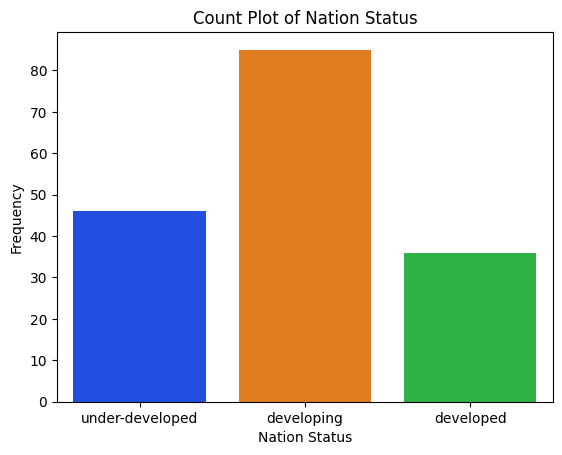

In [39]:
# Plotting number of countries for each cluster label
sns.countplot(x='Nation status', data=df, palette='bright')
plt.xlabel('Nation Status')
plt.ylabel('Frequency')
plt.title('Count Plot of Nation Status')
plt.show()